In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [3]:
df_I10= pd.read_csv('../../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

Index(['Unnamed: 0', 'EDC_SBA', 'OPRTN_YN', 'MDCARE_DD_CNT', 'BTH_YYYY',
       'MCARE_RSLT_TYPE', 'MDCARE_DD_CNT.1', 'EDC_ADD_RT'],
      dtype='object')

### EDA 전략 : 상관관계 확인
- 궁금한 점 : 고혈압환자들의 심결본인부담금에 영향을 끼치는 변수들이 무엇인지 
- 목표 변수 : '심결본인부담금' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인
- 설명 변수 설정 : 
    - 수술 여부 (OPRTN_YN)
    - 입내원일수 (MDCARE_DD_CNT) 
    - 출생년도 (BTH_YYYY)

In [5]:
df_I10_h = df_I10[['EDC_SBA','OPRTN_YN','MDCARE_DD_CNT','BTH_YYYY']]
df_I10_h  #분석할 컬럼들만 추출

,EDC_SBA,OPRTN_YN,MDCARE_DD_CNT,BTH_YYYY
0,3000,0,1,1921LE
1,6000,0,2,1921LE
2,3000,0,1,1921LE
3,4200,0,1,1921LE
4,1500,0,1,1921LE
...,...,...,...,...
4200,3000,0,1,2005
4201,3000,0,1,2005
4202,3000,0,1,2005
4203,3000,0,1,2005


In [7]:
df_I10_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EDC_SBA        4205 non-null   int64 
 1   OPRTN_YN       4205 non-null   int64 
 2   MDCARE_DD_CNT  4205 non-null   int64 
 3   BTH_YYYY       4205 non-null   object
dtypes: int64(3), object(1)
memory usage: 131.5+ KB


In [9]:
df_I10_h.isnull().sum()   #데이터 전처리

EDC_SBA          0
OPRTN_YN         0
MDCARE_DD_CNT    0
BTH_YYYY         0
dtype: int64

In [11]:
df_I10_h.corr() # 상관 계수 계산

C:\Users\04-04\AppData\Local\Temp\ipykernel_15084\3122358078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_I10_h.corr() # 상관 계수 계산


,EDC_SBA,OPRTN_YN,MDCARE_DD_CNT
EDC_SBA,1.000000,0.130686,0.411302
OPRTN_YN,0.130686,1.000000,0.044914
MDCARE_DD_CNT,0.411302,0.044914,1.000000


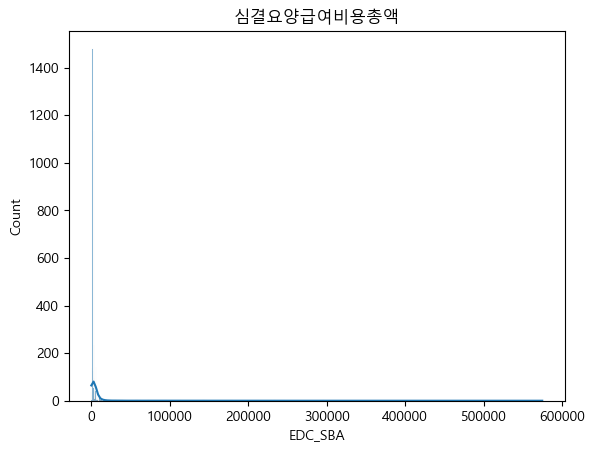

In [26]:
sns.histplot(data=df_I10_h , x='EDC_SBA',kde=True)
plt.title("심결요양급여비용총액")
plt.show()

In [13]:
df_I10_h['EDC_SBA'].value_counts()

1500      1480
3000       942
3100       195
2900       173
1000       136
          ... 
419100       1
542210       1
12920        1
574770       1
25200        1
Name: EDC_SBA, Length: 353, dtype: int64

#### 범주형과 연속형(순서형)으로 dtype변형
- BTH_YYYY(출생년도) object -> int형
    - 1920LE를 int형으로 바꾸기 위해서는 LE를 제거하고 '1921'값을 이용해서 분석해야 하는데 그건 정확한 분석이라고 생각하지 않아우선, 1920LE사람들을 제외하고 분석함

In [14]:
df_I10_h.info()   # Dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EDC_SBA        4205 non-null   int64 
 1   OPRTN_YN       4205 non-null   int64 
 2   MDCARE_DD_CNT  4205 non-null   int64 
 3   BTH_YYYY       4205 non-null   object
dtypes: int64(3), object(1)
memory usage: 131.5+ KB


In [15]:
df_I10_h = df_I10_h[~df_I10_h["BTH_YYYY"].str.contains("1921LE", case=False)] #LE 있는 데이터 삭제

In [21]:
df_I10_h[:5]  # 12LE 데이터 삭제됨 확인

,EDC_SBA,OPRTN_YN,MDCARE_DD_CNT,BTH_YYYY
11,8580,0,1,1926
12,2900,0,1,1926
13,2900,0,1,1926
14,2900,0,1,1926
15,3500,0,1,1926


In [23]:
df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)

C:\Users\04-04\AppData\Local\Temp\ipykernel_15084\1182345637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)


In [25]:
df_I10_h.info()  # Dtype 변경확인 : int형으로 변경 성공

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 11 to 4204
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EDC_SBA        4194 non-null   int64 
 1   OPRTN_YN       4194 non-null   object
 2   MDCARE_DD_CNT  4194 non-null   int64 
 3   BTH_YYYY       4194 non-null   int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 147.4+ KB


### 시각화 확인


#### 변수간에 상관성 확인
- 목표 변수는 정규화 여부 판단
- 목표 변수와 각 설명 변수 간에 관계 확인

In [30]:
df_I10_h.describe().columns.to_list() #연속형 분포도 확인

['EDC_SBA', 'MDCARE_DD_CNT', 'BTH_YYYY']

#### 연속형 분포도 확인

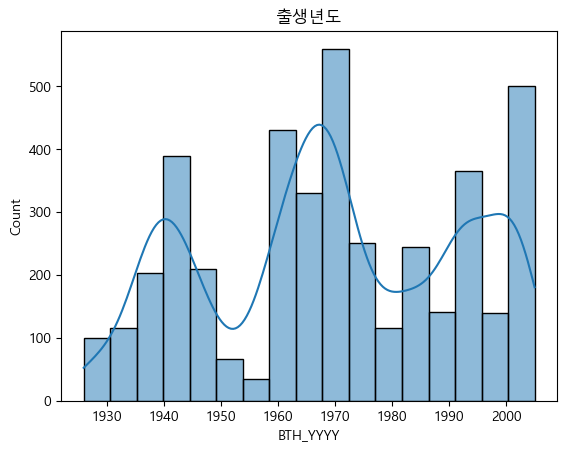

In [29]:
sns.histplot(data=df_I10_h, x='BTH_YYYY', kde=True)
plt.title('출생년도')
plt.show() 

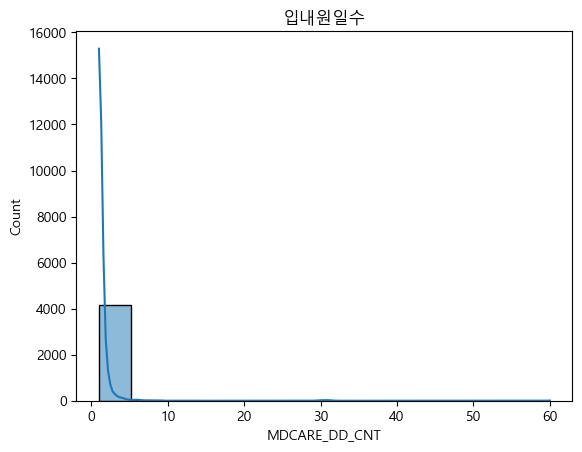

In [31]:
sns.histplot(data=df_I10_h, x='MDCARE_DD_CNT', kde=True)
plt.title('입내원일수')
plt.show() 

#### 범주형 분포도 확인

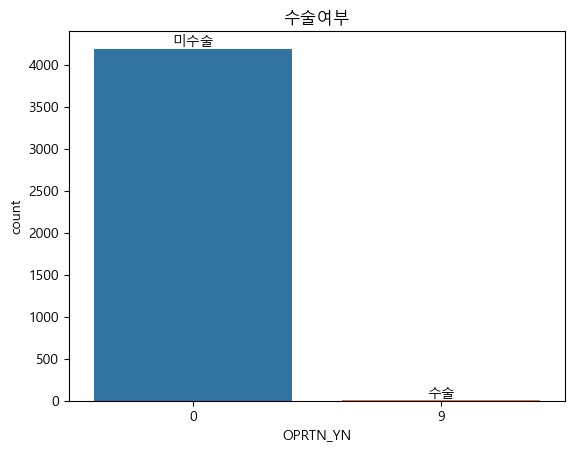

In [38]:
sns.countplot(data=df_I10_h, x='OPRTN_YN')
plt.title('수술여부')
plt.text(0, df_I10_h['OPRTN_YN'].value_counts().loc[0], '미수술', ha='center', va='bottom', fontsize=10)
plt.text(1, df_I10_h['OPRTN_YN'].value_counts().loc[9], '수술', ha='center', va='bottom', fontsize=10)
plt.show()

In [ ]:
df_I10_h['OPRTN_YN'].value_counts()